[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HongB1/2022-KHU-Bioinformatics-lab/blob/master/code/Lab15_LinearRegression/LR_HW.ipynb)

In [1]:
import numpy as np
import sklearn
import pandas as pd
from sklearn import datasets

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = sklearn.datasets.fetch_california_housing()

In [3]:
dataset['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
dataset['data'].shape

(20640, 8)

In [5]:
dataset['data'][0].shape

(8,)

In [6]:
dataset['data'][:,0]

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [7]:
dataset['data'][0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [8]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
label = dataset['target']

In [11]:
label

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
df['house_price'] = label

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
import matplotlib.pyplot as plt

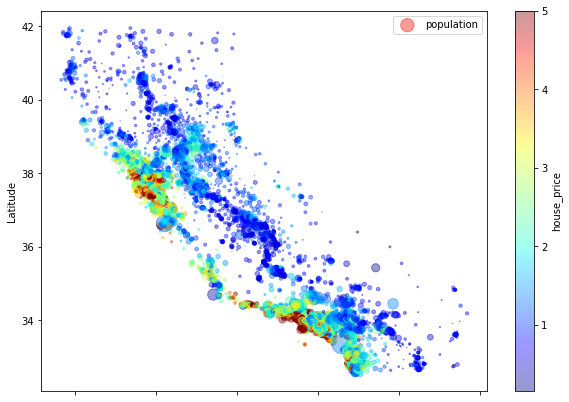

In [15]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
       s=df['Population']/100, label='population', figsize=(10,7),
       c='house_price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [16]:
corr_matrix = df.corr()

In [17]:
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
house_price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [18]:
attributes = df.columns.tolist()[:-2]

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='AveR

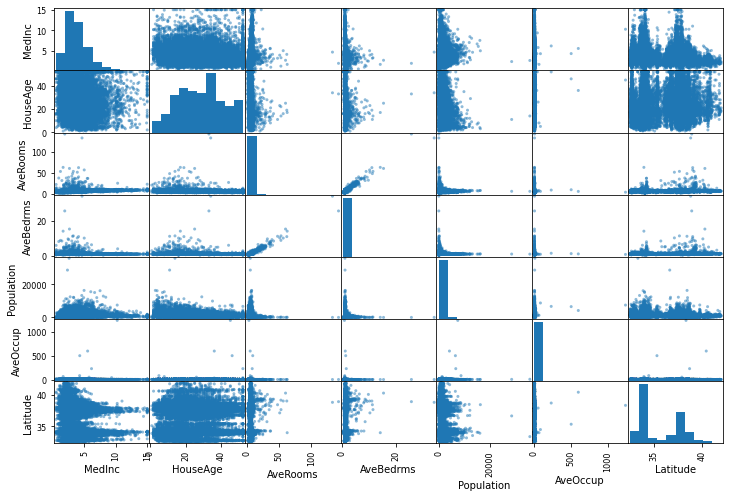

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[attributes], figsize=(12,8))

Text(0, 0.5, 'House price')

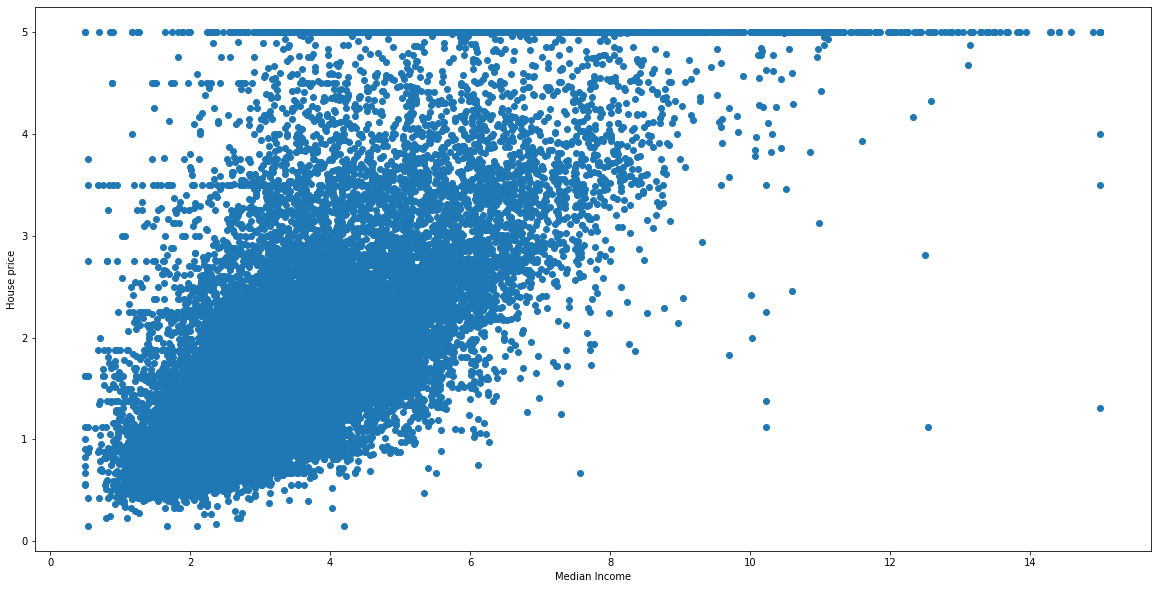

In [20]:
ax = plt.figure(figsize=(20, 10))
plt.scatter(df['MedInc'], label)
plt.xlabel('Median Income')
plt.ylabel('House price')

In [21]:
df['MedInc']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split


# 데이터셋을 8:2로 나누기위함
xTrain, xTest, yTrain, yTest = train_test_split(df['MedInc'], 
                                                df['house_price'], 
                                                test_size = 0.2,
                                                random_state=42)

In [24]:
xTrain.shape

(16512,)

In [25]:
xTrain

14196    3.2596
8267     3.8125
17445    4.1563
14265    1.9425
2271     3.5542
          ...  
11284    6.3700
11964    3.0500
5390     2.9344
860      5.7192
15795    2.5755
Name: MedInc, Length: 16512, dtype: float64

In [26]:
np.array(xTrain).reshape(-1,1).shape

(16512, 1)

In [27]:
dataset['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(np.array(xTrain).reshape(-1,1), yTrain)

In [29]:
result.coef_

array([0.41933849])

In [30]:
result.intercept_

0.4445972916907921

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
print('Training loss:', mean_squared_error(yTrain, result.predict(np.array(xTrain).reshape(-1,1))))
print('Test loss:', mean_squared_error(yTest, result.predict(np.array(xTest).reshape(-1,1))))

Training loss: 0.6991447170182824
Test loss: 0.7091157771765548


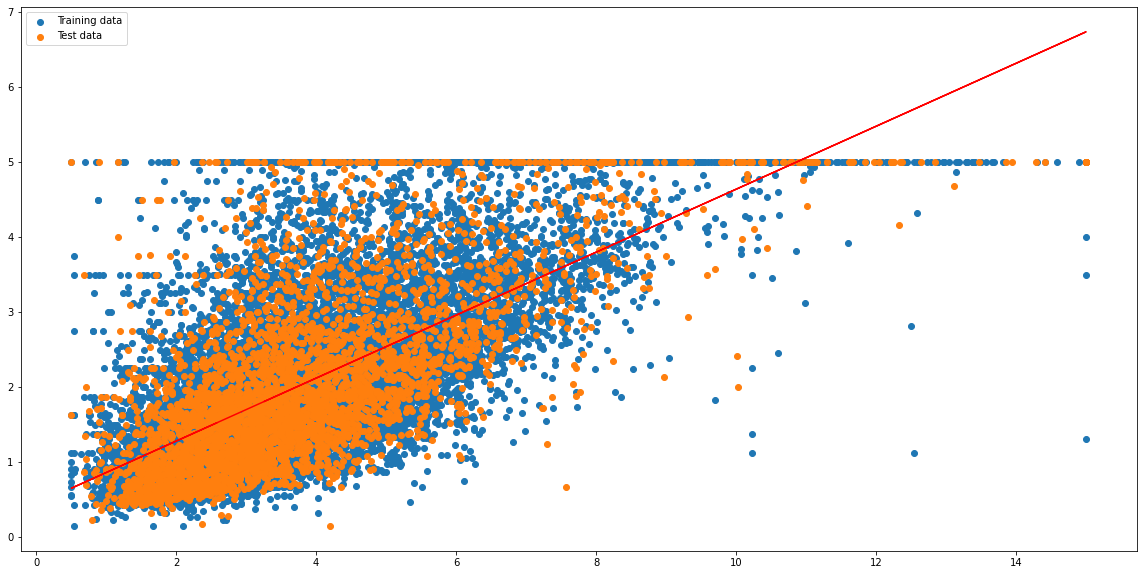

In [33]:
ax = plt.figure(figsize = (20,10))

plt.scatter(xTrain, yTrain, label = 'Training data')
plt.scatter(xTest, yTest, label = 'Test data')
plt.plot(xTrain, result.predict(np.array(xTrain).reshape(-1,1)), color='r')
plt.legend()